
Explain the difference between standard error and confidence intervals.

**Ans**
Standard error of the estimate refers to one standard deviation of the distribution of the parameter of interest, that are you estimating. Confidence intervals are the quantiles of the distribution of the parameter of interest, that you are estimating, at least in a frequentist paradigm




In [27]:
df = pa.read_csv('iris.csv')

In [28]:
df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


Use the workout data and graph the average calories by workout type and include the 95% confidence interval.

In [32]:

dfgrouped = df.groupby('variety').agg(['mean','std', 'count'])



In [33]:
import numpy as np
from scipy.stats import t

def SE(std,n):
  return std/np.sqrt(n)

In [35]:
dfgroupedSepalLength = dfgrouped['sepal.length']

dfgroupedSepalLength['SE'] = dfgroupedSepalLength.apply(lambda x: SE(x['std'],x['count']), axis = 1)


dfgroupedSepalLength.loc[:,'95%'] = dfgroupedSepalLength.loc[:,'SE']*t.ppf(.975,49)

dfgroupedSepalLength

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


,mean,std,count,SE,95%
variety,,,,,
Setosa,5.006,0.352490,50,0.049850,0.100176
Versicolor,5.936,0.516171,50,0.072998,0.146694
Virginica,6.588,0.635880,50,0.089927,0.180715


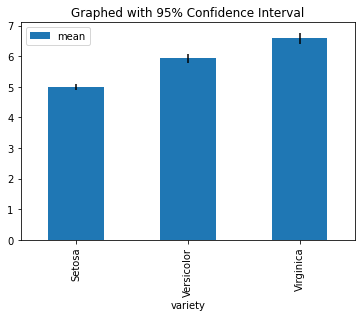

In [36]:
dfgroupedSepalLength.plot.bar(y = 'mean',yerr = '95%', title = 'Graphed with 95% Confidence Interval' )